In [25]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
def clean_text(text):
    text = re.sub(r'[!@#$(),\n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'\[.*?\]', ' ', text)
    text = text.lower()
    return text.strip()

In [28]:
def load_data(path):
    df = pd.read_csv(path)
    df['Clean_Text'] = df['Text'].apply(clean_text)
    return df

In [34]:
def train_model(df):
    X = df['Clean_Text']
    y = df['Language']

    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    model_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('nb', MultinomialNB())
    ])

    print(" Performing 5-Fold Cross-Validation...")
    scores = cross_val_score(model_pipeline, X, y_encoded, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {scores}")
    print(f"Mean Accuracy: {np.mean(scores):.4f}")
    print(f"Standard Deviation: {np.std(scores):.4f}\n")
    
    model_pipeline.fit(X, y_encoded)

    y_pred = model_pipeline.predict(X)
    print("\n Classification Report on Full Training Set:\n")
    print(classification_report(y_encoded, y_pred, target_names=label_encoder.classes_))

    plt.figure(figsize=(12, 8))
    cm = confusion_matrix(y_encoded, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Confusion Matrix on Full Training Data")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return model_pipeline, label_encoder



In [35]:
def save_artifacts(model_pipeline, label_encoder):
    joblib.dump(model_pipeline, 'language_pipeline.pkl')
    joblib.dump(label_encoder, 'label_encoder.pkl')
    print(" Model pipeline and label encoder saved!")

In [36]:
def predict_language(text, model_pipeline, label_encoder):
    cleaned = clean_text(text)
    prediction = model_pipeline.predict([cleaned])
    return label_encoder.inverse_transform(prediction)[0]

 Performing 5-Fold Cross-Validation...
Cross-Validation Accuracy Scores: [0.96808511 0.97969052 0.96274794 0.90614417 0.92694727]
Mean Accuracy: 0.9487
Standard Deviation: 0.0276


 Classification Report on Full Training Set:

              precision    recall  f1-score   support

      Arabic       1.00      0.97      0.99       536
      Danish       1.00      0.94      0.97       428
       Dutch       1.00      0.98      0.99       546
     English       0.90      1.00      0.95      1385
      French       0.99      1.00      0.99      1014
      German       1.00      0.98      0.99       470
       Greek       1.00      0.96      0.98       365
       Hindi       1.00      0.78      0.88        63
     Italian       1.00      0.99      1.00       698
     Kannada       1.00      0.95      0.97       369
   Malayalam       1.00      0.99      0.99       594
  Portugeese       1.00      1.00      1.00       739
     Russian       1.00      0.99      1.00       692
     Spanish    

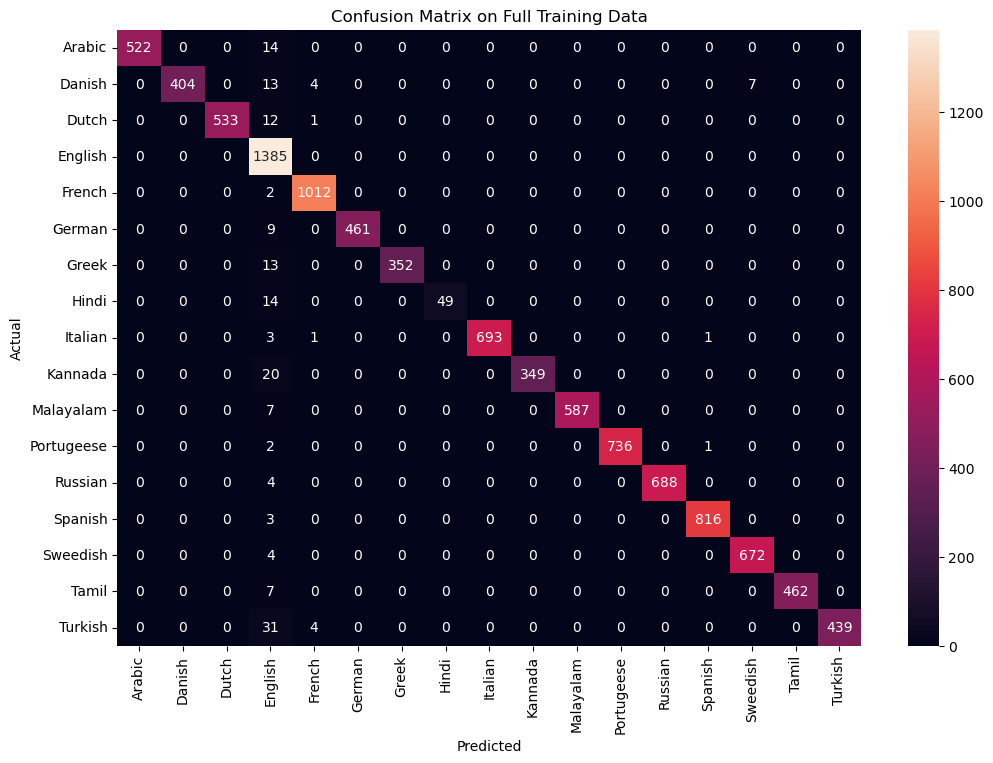

 Model pipeline and label encoder saved!

 The language of 'hola' is: Spanish


In [37]:
if __name__ == "__main__":
    df = load_data("Language Detection.csv")
    model_pipeline, label_encoder = train_model(df)
    save_artifacts(model_pipeline, label_encoder)
    sample_text = "hola"
    predicted_lang = predict_language(sample_text, model_pipeline, label_encoder)
    print(f"\n The language of '{sample_text}' is: {predicted_lang}")